In [1]:
import tensorflow_datasets as tfds
from tqdm import tqdm
import pandas as pd
tqdm.pandas()

In [2]:
(ds_train, ds_validation, ds_test), ds_info = tfds.load('cnn_dailymail', shuffle_files = True, split = ['train', 'validation', 'test'], with_info = True)

2022-01-18 16:40:39.495042: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/287113 [00:00<?, ? examples/s]

Shuffling cnn_dailymail-train.tfrecord...:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/13368 [00:00<?, ? examples/s]

Shuffling cnn_dailymail-validation.tfrecord...:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/11490 [00:00<?, ? examples/s]

Shuffling cnn_dailymail-test.tfrecord...:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /Users/sarvesh26/tensorflow_datasets/cnn_dailymail/3.1.0. Subsequent calls will reuse this data.
Metal device set to: Apple M1


2022-01-18 16:44:30.684554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-18 16:44:30.685280: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
df_train = tfds.as_dataframe(ds_train.take(-1), ds_info)
df_train.head()

2022-01-18 16:44:30.782401: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-18 16:44:30.784096: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


,article,highlights
0,"b""Chelsea's early season form may have led to ...","b""Chelsea are four points clear at the top of ..."
1,"b""By . Deborah Arthurs . UPDATED: . 13:47 EST,...","b'Brand has 10,163,728 fans on Facebook while ..."
2,"b""By . Chris Pleasance . Police are hunting fo...","b""Two men filmed taking iPad from canoe rental..."
3,b'The Sunni extremists running roughshod acros...,"b""Lukan Faily said Monday that while Obama fre..."
4,"b""Britain is at 'very significant risk' from a...","b""Hammond\xc2\xa0warns against complacency in ..."


In [4]:
df_val = tfds.as_dataframe(ds_validation.take(-1), ds_info)
df_val.head()

,article,highlights
0,"b""Sally Forrest, an actress-dancer who graced ...","b""Sally Forrest, an actress-dancer who graced ..."
1,"b""A middle-school teacher in China has inked h...",b'Works include pictures of Presidential Palac...
2,"b""A man convicted of killing the father and si...","b""Iftekhar Murtaza, 29, was convicted a year a..."
3,"b""Avid rugby fan Prince Harry could barely wat...","b""Prince Harry in attendance for England's cru..."
4,"b""A Triple M Radio producer has been inundated...","b""Nick Slater's colleagues uploaded a picture ..."


In [5]:
df_test = tfds.as_dataframe(ds_test.take(-1), ds_info)
df_test.head()

,article,highlights
0,"b""Dougie Freedman is on the verge of agreeing ...","b""Nottingham Forest are close to extending Dou..."
1,"b""Ever noticed how plane seats appear to be ge...",b'Experts question if packed out planes are p...
2,"b""A drunk teenage boy had to be rescued by sec...","b""Drunk teenage boy climbed into lion enclosur..."
3,"b""Liverpool target Neto is also wanted by PSG ...",b'Fiorentina goalkeeper Neto has been linked w...
4,"b""Bruce Jenner will break his silence in a two...","b""Tell-all interview with the reality TV star,..."


In [6]:
def decode_text(x):
    return x.decode('utf-8')

In [7]:
df_train.loc[:, 'article'] = df_train.loc[:, 'article'].progress_apply(decode_text)
df_train.loc[:, 'highlights'] = df_train.loc[:, 'highlights'].progress_apply(decode_text)
df_val.loc[:, 'article'] = df_val.loc[:, 'article'].progress_apply(decode_text)
df_val.loc[:, 'highlights'] = df_val.loc[:, 'highlights'].progress_apply(decode_text)
df_test.loc[:, 'article'] = df_test.loc[:, 'article'].progress_apply(decode_text)
df_test.loc[:, 'highlights'] = df_test.loc[:, 'highlights'].progress_apply(decode_text)

100%|█████████████████████████████████| 11490/11490 [00:00<00:00, 942420.42it/s]


In [12]:
!pip3 install tensorflow_addons

ERROR: Could not find a version that satisfies the requirement tensorflow_addons (from versions: none)
ERROR: No matching distribution found for tensorflow_addons


In [9]:
import os, string, re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk import wordpunct_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Layer, Input, Dense, Embedding, Concatenate, TimeDistributed, RNN, LSTMCell, AdditiveAttention, GRU, LSTM
from tensorflow.keras.backend import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.losses import Loss, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

ModuleNotFoundError: No module named 'tensorflow_addons'

In [13]:
def length(x):
    return len(wordpunct_tokenize(x))

In [14]:
df_train['Article_Length'] = df_train['article'].progress_apply(length)
df_train['Summary_Length'] = df_train['highlights'].progress_apply(length)

100%|██████████| 287113/287113 [00:04<00:00, 68003.84it/s]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


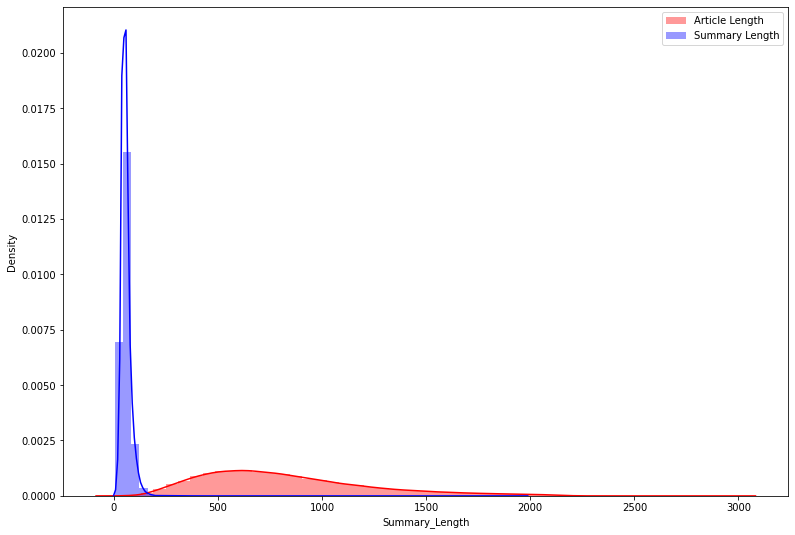

In [15]:
plt.figure(figsize = (13, 9))
sns.distplot(df_train['Article_Length'], color = 'red', label = 'Article Length')
sns.distplot(df_train['Summary_Length'], color = 'blue', label = 'Summary Length')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


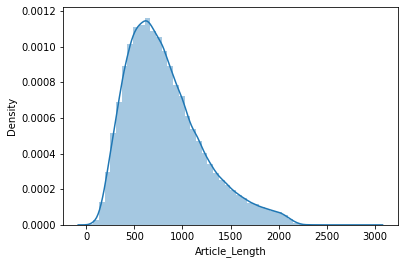

In [16]:
sns.distplot(df_train['Article_Length'])

In [17]:
df_train['Article_Length'].describe()

count    287113.000000
mean        816.341691
std         397.999147
min          11.000000
25%         522.000000
50%         745.000000
75%        1035.000000
max        2985.000000
Name: Article_Length, dtype: float64

In [18]:
np.percentile(df_train['Article_Length'], 90)

1378.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


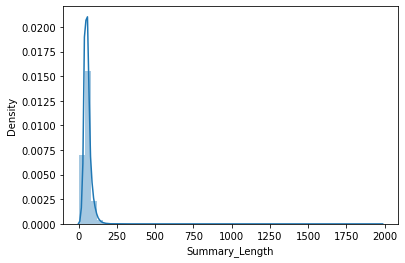

In [19]:
sns.distplot(df_train['Summary_Length'])

In [20]:
df_train['Summary_Length'].describe()

count    287113.000000
mean         57.694793
std          24.225986
min           4.000000
25%          42.000000
50%          54.000000
75%          67.000000
max        1982.000000
Name: Summary_Length, dtype: float64

In [21]:
np.percentile(df_train['Summary_Length'], 90)

86.0

In [22]:
df_train.drop(df_train[df_train['Article_Length'] > 550].index, inplace = True)

In [23]:
df_train['Article_Length'].describe()

count    81121.000000
mean       400.428890
std        103.339901
min         11.000000
25%        329.000000
50%        416.000000
75%        486.000000
max        550.000000
Name: Article_Length, dtype: float64

In [24]:
df_train['Summary_Length'].describe()

count    81121.000000
mean        49.408439
std         19.547459
min          6.000000
25%         39.000000
50%         47.000000
75%         58.000000
max       1982.000000
Name: Summary_Length, dtype: float64

In [25]:
np.percentile(df_train['Article_Length'], 80)

500.0

In [26]:
def preprocess_text(free_text):
    # remove non-word characters    
    ft = free_text.strip()
    tokens = wordpunct_tokenize(ft)
    tokens.append('_END_')
    tokens.insert(0, '_START_')
    return tokens

In [27]:
embed_size = 300
embedding_path = '/content/drive/MyDrive/glove.840B.300d.txt'

In [28]:
df_train['preprocessed_articles'] = df_train['article'].progress_apply(preprocess_text)
df_train['preprocessed_summaries'] = df_train['highlights'].progress_apply(preprocess_text)
df_val['preprocessed_articles'] = df_val['article'].progress_apply(preprocess_text)
df_val['preprocessed_summaries'] = df_val['highlights'].progress_apply(preprocess_text)

100%|██████████| 13368/13368 [00:00<00:00, 37850.55it/s]


In [29]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')
    
# return word and its corresponding 300 dimensional vector as a dictionary
embedding_index = dict(get_coefs(*o.split(" ")) for o in open(embedding_path, encoding='utf-8', errors='ignore'))

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['preprocessed_articles'].tolist() + df_val['preprocessed_articles'].tolist() + 
                       df_train['preprocessed_summaries'].tolist() + df_val['preprocessed_summaries'].tolist())

In [31]:
vocab_size = len(tokenizer.word_index)
max_features = vocab_size

In [32]:
def create_glove(word_index, embeddings_index):
    emb_mean,emb_std = -0.005838499,0.48782197
    all_embs = np.stack(embeddings_index.values())
    embed_size = all_embs.shape[1]
    nb_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

    count_found = nb_words
    for word, i in tqdm(word_index.items()):
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] =  embedding_vector
        else:
            if word.islower():
                # try to get the embedding of word in titlecase if lowercase is not present
                embedding_vector = embeddings_index.get(word.capitalize())
                if embedding_vector is not None:
                    embedding_matrix[i] = embedding_vector
                else:
                    count_found -= 1
            else:
                count_found -= 1
    print("Got embedding for ",count_found," words.")
    return embedding_matrix

In [33]:
# Create vocabulary using tokenizer's assigned indices to words
word_index = tokenizer.word_index
reverse_word_index = tokenizer.index_word

In [34]:
embedding_matrix = create_glove(word_index, embedding_index)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████| 215899/215899 [00:00<00:00, 432772.03it/s]

Got embedding for  163750  words.


In [35]:
embedding_matrix.shape

(215899, 300)

In [36]:
maxlen_article = 500
maxlen_summary = 50
batch_size = 32

In [37]:
train_article_sequences = tokenizer.texts_to_sequences(df_train['preprocessed_articles'].tolist())
train_summary_sequences = tokenizer.texts_to_sequences(df_train['preprocessed_summaries'].tolist())

In [38]:
X_train = tf.constant(pad_sequences(train_article_sequences, maxlen = maxlen_article, padding = 'post'))
y_train = tf.constant(pad_sequences(train_summary_sequences, maxlen = maxlen_summary, padding = 'post'))

In [39]:
X_train.shape[0]

81121

In [40]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [41]:
y_train.shape

TensorShape([81121, 50])

In [42]:
validation_article_sequences = tokenizer.texts_to_sequences(df_val['preprocessed_articles'].tolist())
validation_summary_sequences = tokenizer.texts_to_sequences(df_val['preprocessed_summaries'].tolist())

In [43]:
X_val = tf.constant(pad_sequences(validation_article_sequences, maxlen = maxlen_article, padding = 'post'))
y_val = tf.constant(pad_sequences(validation_summary_sequences, maxlen = maxlen_summary, padding = 'post'))

In [44]:
X_val.shape

TensorShape([13368, 500])

In [45]:
type(X_val)

tensorflow.python.framework.ops.EagerTensor

In [46]:
X_val[:3, :10]

<tf.Tensor: shape=(3, 10), dtype=int32, numpy=
array([[   28,  7149,  9395,     3,    37,  1753,    10,  6873,    42,
        19859],
       [   15,   120,   651,     3,  3999,    15,   120,  4424,     8,
        10656],
       [ 2744,   386,   811,   733,     9,    11,   345,    22,     2,
        42661]], dtype=int32)>

In [47]:
y_val.shape

TensorShape([13368, 50])

## Text Summarizer Model

In [48]:
class Encoder(Layer):
    def __init__(self, input_vocab_size, embedding_dim):
        super(Encoder, self).__init__()
        self.input_vocab_size = input_vocab_size

        # The embedding layer converts tokens to vectors
        self.embedding = Embedding(self.input_vocab_size, embedding_dim, weights = [embedding_matrix], trainable = False)
        self.embedding.build(input_shape = maxlen_article)

        # The GRU RNN layer processes those vectors sequentially.

        self.lstm1 = LSTM(128, return_sequences=True, 
                     return_state=True)

        # self.lstm2 = LSTM(128, return_sequences=True,
        #              return_state=True)
    
        # self.lstm3 = LSTM(128, return_sequences=True,
        #              return_state=True)

    def call(self, tokens, state=None):
    
        # 2. The embedding layer looks up the embedding for each token.
        vectors = self.embedding(tokens)

        # 3. The GRU processes the embedding sequence.
        #    output shape: (batch, s, enc_units)
        #    state shape: (batch, enc_units)
        output_1, state_h1, state_c1  = self.lstm1(vectors)
        # output_2, state_h2, state_c2 = self.lstm2(output_1)
        # output_3, state_h3, state_c3 = self.lstm3(output_2)
        # 4. Returns the new sequence and its state.
        # return output_3, state_h3
        # return output_2, state_h2
        return output_1, state_h1

In [49]:
import typing
from typing import Any, Tuple

class DecoderInput(typing.NamedTuple):
    new_tokens: Any
    enc_output: Any
    mask: Any

class DecoderOutput(typing.NamedTuple):
    logits: Any
    attention_weights: Any

In [50]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        # For Eqn. (4), the  Bahdanau attention
        self.W1 = tf.keras.layers.Dense(units, use_bias=False)
        self.W2 = tf.keras.layers.Dense(units, use_bias=False)

        self.attention = AdditiveAttention()

    def call(self, query, value, mask):
        # From Eqn. (4), `W1@ht`.
        w1_query = self.W1(query)

        # From Eqn. (4), `W2@hs`.
        w2_key = self.W2(value)

        query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
        value_mask = mask

        context_vector, attention_weights = self.attention(
        inputs = [w1_query, value, w2_key],
        mask=[query_mask, value_mask],
        return_attention_scores = True,)

        return context_vector, attention_weights

In [51]:
class Decoder(Layer):
    def __init__(self, output_vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.output_vocab_size = output_vocab_size
        self.embedding_dim = embedding_dim

        # For Step 1. The embedding layer converts token IDs to vectors
        self.embedding = Embedding(self.output_vocab_size, embedding_dim, weights = [embedding_matrix], trainable = False)
        self.embedding.build(input_shape = (None, maxlen_summary))

        # For Step 2. The RNN keeps track of what's been generated so far.
        self.lstm = LSTM(self.dec_units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')

        # For step 3. The RNN output will be the query for the attention layer.
        self.attention = BahdanauAttention(self.dec_units)

        # For step 4. Eqn. (3): converting `ct` to `at`
        self.Wc = Dense(dec_units, activation=tf.keras.activations.tanh,
                                    use_bias=False)

        # For step 5. This fully connected layer produces the logits for each
        # output token.
        self.fc = Dense(self.output_vocab_size)
    
    def call(self, inputs: DecoderInput, state=None) -> Tuple[DecoderOutput, tf.Tensor]:

        # Step 1. Lookup the embeddings
        vectors = self.embedding(inputs.new_tokens)
    
        # Step 2. Process one step with the RNN
        rnn_output, state, carry_state = self.lstm(vectors)

        # Step 3. Use the RNN output as the query for the attention over the
        # encoder output.
        context_vector, attention_weights = self.attention(query = rnn_output, value = inputs.enc_output, mask = inputs.mask)

        # Step 4. Eqn. (3): Join the context_vector and rnn_output
        #     [ct; ht] shape: (batch t, value_units + query_units)
        context_and_rnn_output = tf.concat([context_vector, rnn_output], axis = -1)

        # Step 4. Eqn. (3): `at = tanh(Wc@[ct; ht])`
        attention_vector = self.Wc(context_and_rnn_output)
        
        # Step 5. Generate logit predictions:
        logits = self.fc(attention_vector)

        return DecoderOutput(logits, attention_weights), state

In [52]:
class MaskedLoss(Loss):
    def __init__(self):
        self.name = 'masked_loss'
        self.loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

    def __call__(self, y_true, y_pred):
        # Calculate the loss for each item in the batch.
        loss = self.loss(y_true, y_pred)
    
        # Mask off the losses on padding.
        mask = tf.cast(y_true != 0, tf.float32)
        loss *= mask

        # Return the total.
        return tf.reduce_sum(loss)

In [53]:
import time

In [54]:
class TextSummarizerModel(Model):
    def __init__(self, use_tf_function=True):
        super(TextSummarizerModel, self).__init__()
        self.encoder = Encoder(vocab_size, embed_size)
        self.decoder = Decoder(vocab_size, embed_size, 128)
        self.use_tf_function = use_tf_function

    def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
        input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]
        # Run the decoder one step.
        decoder_input = DecoderInput(new_tokens=input_token,
                               enc_output=enc_output,
                               mask=input_mask)
        # print('Entered Decoder')
        dec_result, dec_state = self.decoder(decoder_input, state=dec_state)
        # print('Exit Decoder')
        # `self.loss` returns the total for non-padded tokens
        y = target_token
        y_pred = dec_result.logits
        step_loss = self.loss(y, y_pred)
        # print('Exit Loop Decoder')
        return step_loss, dec_state

    def get_masks(self, input_tokens, target_tokens):
        return (input_tokens != 0), (target_tokens != 0)

    def _train_step(self, input_tokens, target_tokens):
        max_target_length = maxlen_summary

        num_batches = X_train.shape[0] // batch_size
        start_time = time.time()
        for i in tf.range(num_batches):

            batch_inputs = input_tokens[i * batch_size: (i + 1) * batch_size, :]
            batch_outputs = target_tokens[i * batch_size: (i + 1) * batch_size, :]

            input_mask, target_mask = self.get_masks(batch_inputs, batch_outputs)

            with tf.GradientTape() as tape:
                # Encode the input
                enc_output, enc_state = self.encoder(batch_inputs)

                # Initialize the decoder's state to the encoder's final state.
                # This only works if the encoder and decoder have the same number of
                # units.
                dec_state = enc_state
                loss = tf.constant(0.0)

                for t in tf.range(max_target_length - 1):
                    # Pass in two tokens from the target sequence:
                    # 1. The current input to the decoder.
                    # 2. The target for the decoder's next prediction.
                    new_tokens = batch_outputs[:, t:t+2]
                    step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                             enc_output, dec_state)
                    loss = loss + step_loss

                # Average the loss over all non padding tokens.
                average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

            # Apply an optimization step
            variables = self.trainable_variables
            gradients = tape.gradient(average_loss, variables)
            self.optimizer.apply_gradients(zip(gradients, variables))

            # Return a dict mapping metric names to current value
            # print('Batch {}: Loss = {}'.format(i, average_loss))
            # print('Time Taken for batch: {}s'.format(time.time() - start_time))
            return {'batch_loss': average_loss}

    @tf.function
    def _tf_train_step(self, input_tokens, output_tokens):
        # print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
        return self._train_step(input_tokens, output_tokens)

    def train_step(self, inputs):
        input_tokens, output_tokens = inputs
        if self.use_tf_function:
            return self._tf_train_step(input_tokens, output_tokens)
        else:
            return self._train_step(input_tokens, output_tokens)


In [55]:
class BatchLogs(tf.keras.callbacks.Callback):
    def __init__(self, key):
        self.key = key
        self.logs = []

    def on_train_batch_end(self, n, logs):
        self.logs.append(logs[self.key])

batch_loss = BatchLogs('batch_loss')

In [56]:
model = TextSummarizerModel()

# Configure the loss and optimizer
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = MaskedLoss())

In [ ]:
model.fit(X_train, y_train, epochs = 10, callbacks=[batch_loss])

Epoch 1/10
1006/2536 [==========>...................] - ETA: 31:26 - batch_loss: 7.2135

In [ ]:
model.save('model_bahdanau_only.h5')

In [ ]:
class Summarizer(tf.Module):
    def __init__(self, encoder, decoder):
        self.encoder = encoder
        self.decoder = decoder
        self.output_token_string_from_index = (tf.keras.layers.StringLookup(
            vocabulary = word_index.keys(),
            mask_token='',
            invert=True))
        # The output should never generate padding, unknown, or start.
        index_from_string = tf.keras.layers.StringLookup(vocabulary = word_index.keys(), mask_token='')
        token_mask_ids = index_from_string(['', '_START_', '_END_']).numpy()
        token_mask = np.zeros([index_from_string.vocabulary_size()], dtype=np.bool)
        token_mask[np.array(token_mask_ids)] = True
        self.token_mask = token_mask
        self.start_token = index_from_string(tf.constant('_START_'))
        self.end_token = index_from_string(tf.constant('_END_'))
    
    def tokens_to_text(self, result_tokens):
        result_text_tokens = self.output_token_string_from_index(result_tokens)
        
        result_text = tf.strings.reduce_join(result_text_tokens,
                                       axis=1, separator=' ')

        result_text = tf.strings.strip(result_text)
        return result_text

    def sample(self, logits, temperature):
        token_mask = self.token_mask[tf.newaxis, tf.newaxis, :]
  
        # Set the logits for all masked tokens to -inf, so they are never chosen.
        logits = tf.where(self.token_mask, -np.inf, logits)

        if temperature == 0.0:
            new_tokens = tf.argmax(logits, axis=-1)
        else: 
            logits = tf.squeeze(logits, axis=1)
        
        new_tokens = tf.random.categorical(logits/temperature,
                                        num_samples=1)
        return new_tokens

    def abstractive_summarize(self, input_tokens, *, max_length=maxlen_article, return_attention=True, temperature=1.0):
        batch_size = tf.shape(input_tokens)[0]
        enc_output, enc_state = self.encoder(input_tokens)

        dec_state = enc_state
        new_tokens = tf.fill([batch_size, 1], self.start_token)

        result_tokens = []
        attention = []
        done = tf.zeros([batch_size, 1], dtype=tf.bool)

        for _ in range(max_length):
            dec_input = DecoderInput(new_tokens=new_tokens,
                             enc_output=enc_output,
                             mask=(input_tokens!=0))

            dec_result, dec_state = self.decoder(dec_input, state=dec_state)

            attention.append(dec_result.attention_weights)

            new_tokens = self.sample(dec_result.logits, temperature)

            # If a sequence produces an `end_token`, set it `done`
            done = done | (new_tokens == self.end_token)
            # Once a sequence is done it only produces 0-padding.
            new_tokens = tf.where(done, tf.constant(0, dtype=tf.int64), new_tokens)

            # Collect the generated tokens
            result_tokens.append(new_tokens)

            if tf.executing_eagerly() and tf.reduce_all(done):
                break

        # Convert the list of generates token ids to a list of strings.
        result_tokens = tf.concat(result_tokens, axis=-1)
        result_text = self.tokens_to_text(result_tokens)

        if return_attention:
            attention_stack = tf.concat(attention, axis=1)
            return {'text': result_text, 'attention': attention_stack}
        else:
            return {'text': result_text}

    @tf.function(input_signature=[tf.TensorSpec(dtype=np.ndarray, shape=[None, maxlen_article])])
    def tf_summarize(self, input_text):
        return self.abstractive_summarize(input_text)

In [ ]:
summarizer = Summarizer(encoder = model.encoder, decoder = model.decoder)

In [ ]:
tf.saved_model.save(summarizer, 'summarizer',
                    signatures={'serving_default': translator.tf_summarize}

In [ ]:
import textwrap
# print('Expected output:\n', '\n'.join(textwrap.wrap())

In [ ]:
# from tensorflow_addons import rnn  #cell that we would use
# global_step = tf.Variable(0, trainable=False)
# a variable must be intialized , 
# and we can set it to either be trainable or not
# class Model(object):
#     def __init__(self, reversed_dict, article_max_len, summary_max_len, forward_only=False):
#         self.vocabulary_size = len(reversed_dict)
#         self.embedding_size = 300
#         self.num_hidden = 256
#         self.num_layers = 3
#         self.learning_rate = 0.001
#         self.beam_width = 10
#         if not forward_only:
#             self.keep_prob = 0.8
#         else:
#             self.keep_prob = 1.0
#         self.cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell
#         with tf.compat.v1.variable_scope("decoder/projection"):
#             self.projection_layer = tf.keras.layers.Dense(self.vocabulary_size, use_bias=False)

#         self.batch_size = tf.compat.v1.placeholder(tf.int32, (), name="batch_size")
#         self.X = tf.compat.v1.placeholder(tf.int32, [None, article_max_len])
#         self.X_len = tf.compat.v1.placeholder(tf.int32, [None])
#         self.decoder_input = tf.compat.v1.placeholder(tf.int32, [None, summary_max_len])
#         self.decoder_len = tf.compat.v1.placeholder(tf.int32, [None])
#         self.decoder_target = tf.compat.v1.placeholder(tf.int32, [None, summary_max_len])
#         self.global_step = tf.compat.v1.Variable(0, trainable=False)

#         with tf.name_scope("embedding"):
#             if not forward_only:
#                 init_embeddings = tf.constant(create_glove(word_index, embedding_index), dtype=tf.float32)
#             else:
#                 init_embeddings = tf.random_uniform([self.vocabulary_size, self.embedding_size], -1.0, 1.0)
#             self.embeddings = tf.compat.v1.get_variable("embeddings", initializer=init_embeddings)
#             self.encoder_emb_inp = tf.transpose(tf.nn.embedding_lookup(self.embeddings, self.X), perm=[1, 0, 2])
#             self.decoder_emb_inp = tf.transpose(tf.nn.embedding_lookup(self.embeddings, self.decoder_input), perm=[1, 0, 2])

#         with tf.name_scope("encoder"):
#             fw_cells = [self.cell(self.num_hidden) for _ in range(self.num_layers)]
#             bw_cells = [self.cell(self.num_hidden) for _ in range(self.num_layers)]
#             fw_cells = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(cell) for cell in fw_cells]
#             bw_cells = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(cell) for cell in bw_cells]

#             encoder_outputs, encoder_state_fw, encoder_state_bw = tf.contrib.rnn.stack_bidirectional_dynamic_rnn(
#                 fw_cells, bw_cells, self.encoder_emb_inp,
#                 sequence_length=self.X_len, time_major=True, dtype=tf.float32)
#             self.encoder_output = tf.concat(encoder_outputs, 2)
#             encoder_state_c = tf.concat((encoder_state_fw[0].c, encoder_state_bw[0].c), 1)
#             encoder_state_h = tf.concat((encoder_state_fw[0].h, encoder_state_bw[0].h), 1)
#             self.encoder_state = tf.compat.v1.nn.rnn_cell.LSTMStateTuple(c=encoder_state_c, h=encoder_state_h)

#         with tf.name_scope("decoder"), tf.compat.v1.variable_scope("decoder") as decoder_scope:
#             decoder_cell = self.cell(self.num_hidden * 2)

#             if not forward_only:
#                 attention_states = tf.transpose(self.encoder_output, [1, 0, 2])
#                 attention_mechanism = tfa.seq2seq.BahdanauAttention(
#                     self.num_hidden * 2, attention_states, memory_sequence_length=self.X_len, normalize=True)
#                 decoder_cell = tfa.seq2seq.AttentionWrapper(decoder_cell, attention_mechanism,
#                                                                    attention_layer_size=self.num_hidden * 2)
#                 initial_state = decoder_cell.zero_state(dtype=tf.float32, batch_size=self.batch_size)
#                 initial_state = initial_state.clone(cell_state=self.encoder_state)
#                 helper = tfa.seq2seq.TrainingHelper(self.decoder_emb_inp, self.decoder_len, time_major=True)
#                 decoder = tfa.seq2seq.BasicDecoder(decoder_cell, helper, initial_state)
#                 outputs, _, _ = tfa.seq2seq.dynamic_decode(decoder, output_time_major=True, scope=decoder_scope)
#                 self.decoder_output = outputs.rnn_output
#                 self.logits = tf.transpose(
#                     self.projection_layer(self.decoder_output), perm=[1, 0, 2])
#                 self.logits_reshape = tf.concat(
#                     [self.logits, tf.zeros([self.batch_size, summary_max_len - tf.shape(self.logits)[1], self.vocabulary_size])], axis=1)
#             else:
#                 tiled_encoder_output = tfa.seq2seq.tile_batch(
#                     tf.transpose(self.encoder_output, perm=[1, 0, 2]), multiplier=self.beam_width)
#                 tiled_encoder_final_state = tfa.seq2seq.tile_batch(self.encoder_state, multiplier=self.beam_width)
#                 tiled_seq_len = tfa.seq2seq.tile_batch(self.X_len, multiplier=self.beam_width)
#                 attention_mechanism = tfa.seq2seq.BahdanauAttention(
#                     self.num_hidden * 2, tiled_encoder_output, memory_sequence_length=tiled_seq_len, normalize=True)
#                 decoder_cell = tfa.seq2seq.AttentionWrapper(decoder_cell, attention_mechanism,
#                                                                    attention_layer_size=self.num_hidden * 2)
#                 initial_state = decoder_cell.zero_state(dtype=tf.float32, batch_size=self.batch_size * self.beam_width)
#                 initial_state = initial_state.clone(cell_state=tiled_encoder_final_state)
#                 decoder = tfa.seq2seq.BeamSearchDecoder(
#                     cell=decoder_cell,
#                     embedding=self.embeddings,
#                     start_tokens=tf.fill([self.batch_size], tf.constant(2)),
#                     end_token=tf.constant(3),
#                     initial_state=initial_state,
#                     beam_width=self.beam_width,
#                     output_layer=self.projection_layer
#                 )
#                 outputs, _, _ = tfa.seq2seq.dynamic_decode(
#                     decoder, output_time_major=True, maximum_iterations=summary_max_len, scope=decoder_scope)
#                 self.prediction = tf.transpose(outputs.predicted_ids, perm=[1, 2, 0])

#         with tf.name_scope("loss"):
#             if not forward_only:
#                 crossent = tf.nn.sparse_softmax_cross_entropy_with_logits(
#                     logits=self.logits_reshape, labels=self.decoder_target)
#                 weights = tf.sequence_mask(self.decoder_len, summary_max_len, dtype=tf.float32)
#                 self.loss = tf.reduce_sum(crossent * weights / tf.to_float(self.batch_size))

#                 params = tf.trainable_variables()
#                 gradients = tf.gradients(self.loss, params)
#                 clipped_gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
#                 optimizer = tf.keras.optimizers.Adam(self.learning_rate)
#                 self.update = optimizer.apply_gradients(zip(clipped_gradients, params), global_step=self.global_step)

In [ ]:
# def batch_iter(inputs, outputs, batch_size, num_epochs):
#     inputs = np.array(inputs)
#     outputs = np.array(outputs)

#     num_batches_per_epoch = (len(inputs) - 1) // batch_size + 1
#     for epoch in range(num_epochs):
#         for batch_num in range(num_batches_per_epoch):
#             start_index = batch_num * batch_size
#             end_index = min((batch_num + 1) * batch_size, len(inputs))
#             yield inputs[start_index:end_index], outputs[start_index:end_index]

In [ ]:
# with tf.compat.v1.Session() as sess:
#     model = Model(reverse_word_index, maxlen_article, maxlen_summary)
#     sess.run(tf.global_variables_initializer())
#     saver = tf.compat.v1.train.Saver(tf.global_variables())
#     if 'old_model_checkpoint_path' in globals():
#         print("Continuing from previous trained model:" , old_model_checkpoint_path , "...")
#         saver.restore(sess, old_model_checkpoint_path )

#     batches = batch_iter(X_train, y_train, 32, 20)
#     num_batches_per_epoch = (len(X_train) - 1) // 32 + 1

#     print("\nIteration starts.")
#     print("Number of batches per epoch :", num_batches_per_epoch)
#     for batch_x, batch_y in batches:
#         batch_x_len = list(map(lambda x: len([y for y in x if y != 0]), batch_x))
#         batch_decoder_input = list(map(lambda x: [word_dict["_START_"]] + list(x), batch_y))
#         batch_decoder_len = list(map(lambda x: len([y for y in x if y != 0]), batch_decoder_input))
#         batch_decoder_output = list(map(lambda x: list(x) + [word_dict["_END_"]], batch_y))

#         batch_decoder_input = list(
#             map(lambda d: d + (summary_max_len - len(d)) * [word_dict["<padding>"]], batch_decoder_input))
#         batch_decoder_output = list(
#             map(lambda d: d + (summary_max_len - len(d)) * [word_dict["<padding>"]], batch_decoder_output))

#         train_feed_dict = {
#             model.batch_size: len(batch_x),
#             model.X: batch_x,
#             model.X_len: batch_x_len,
#             model.decoder_input: batch_decoder_input,
#             model.decoder_len: batch_decoder_len,
#             model.decoder_target: batch_decoder_output
#         }

#         _, step, loss = sess.run([model.update, model.global_step, model.loss], feed_dict=train_feed_dict)

#         if step % 1000 == 0:
#             print("step {0}: loss = {1}".format(step, loss))

#         if step % num_batches_per_epoch == 0:
#             hours, rem = divmod(time.perf_counter() - start, 3600)
#             minutes, seconds = divmod(rem, 60)
#             model.save_weights('/content/drive/MyDrive/text_summarizer_models/model_epoch_{}'.format(step // num_batches_per_epoch))
#             print(" Epoch {0}: Model is saved.".format(step // num_batches_per_epoch),
#             "Elapsed: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds) , "\n")